In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

stats = pd.read_csv("data/afl/stats.csv")
players = pd.read_csv("data/afl/players.csv")
games = pd.read_csv("data/afl/games.csv")

player=players["displayName"]=="Franklin, Lance"

# display a list of players
#player=input ([players["displayName"]])

"""
display (players.columns)
display (games.columns)
display (stats.columns)
display(stats)
"""

# merge on playerId
merge_playerStats = players.merge(stats, how="inner", on=["playerId","displayName"])
display ("Player Stats ====================================")
display (merge_playerStats)


# create GamePlayer Stats data frame and merge on gameId and playerId
merge_GamePlayerStats = merge_playerStats.merge(games, how="inner", on=["gameId",'year','round'])
display ("Game player Stats ====================================")
display (merge_GamePlayerStats.columns)
display ("====================================")
display (player)



'Player Stats ===================================='

,playerId,displayName,height,weight,dob,position,origin,gameId,team,year,...,Brownlow Votes,Contested Possessions,Uncontested Possessions,Contested Marks,Marks Inside 50,One Percenters,Bounces,Goal Assists,% Played,Subs
0,2021661124,"Berry, Sam",181,81,12-Feb-2002,"Midfield, Forward",Gippsland Power,2021R104,Adelaide,2021,...,0,4,5,0,0,0,0,1,80,-
1,2021661124,"Berry, Sam",181,81,12-Feb-2002,"Midfield, Forward",Gippsland Power,2021R203,Adelaide,2021,...,0,5,2,0,1,1,0,0,64,-
2,2021661124,"Berry, Sam",181,81,12-Feb-2002,"Midfield, Forward",Gippsland Power,2021R303,Adelaide,2021,...,0,6,6,1,1,2,0,0,77,-
3,2021661124,"Berry, Sam",181,81,12-Feb-2002,"Midfield, Forward",Gippsland Power,2021R407,Adelaide,2021,...,0,3,7,0,0,2,0,1,66,-
4,2021661124,"Berry, Sam",181,81,12-Feb-2002,"Midfield, Forward",Gippsland Power,2021R507,Adelaide,2021,...,0,7,6,0,0,3,0,0,71,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89465,2011838967,"Skinner, Zephaniah",189,79,27-Jun-1989,Forward,-,2012R1902,Western Bulldogs,2012,...,0,4,4,0,0,2,0,2,73,-
89466,2011838967,"Skinner, Zephaniah",189,79,27-Jun-1989,Forward,-,2012R2008,Western Bulldogs,2012,...,0,6,6,0,2,0,0,0,75,-
89467,2011838967,"Skinner, Zephaniah",189,79,27-Jun-1989,Forward,-,2012R2108,Western Bulldogs,2012,...,0,4,4,1,1,1,1,0,74,-
89468,2011838967,"Skinner, Zephaniah",189,79,27-Jun-1989,Forward,-,2012R2207,Western Bulldogs,2012,...,0,9,8,2,1,1,0,1,73,-


'Game player Stats ===================================='

Index(['playerId', 'displayName', 'height', 'weight', 'dob', 'position',
       'origin', 'gameId', 'team', 'year', 'round', 'gameNumber', 'Disposals',
       'Kicks', 'Marks', 'Handballs', 'Goals', 'Behinds', 'Hit Outs',
       'Tackles', 'Rebounds', 'Inside 50s', 'Clearances', 'Clangers', 'Frees',
       'Frees Against', 'Brownlow Votes', 'Contested Possessions',
       'Uncontested Possessions', 'Contested Marks', 'Marks Inside 50',
       'One Percenters', 'Bounces', 'Goal Assists', '% Played', 'Subs', 'date',
       'venue', 'startTime', 'attendance', 'homeTeam', 'homeTeamScore',
       'awayTeam', 'awayTeamScore', 'rainfall'],
      dtype='object')

'===================================='

0       False
1       False
2       False
3       False
4       False
        ...  
1490    False
1491    False
1492    False
1493    False
1494    False
Name: displayName, Length: 1495, dtype: bool

To Do
plot their accumlation of goals over time. The x-axis should be the number of games played and the y-axis should be the number of goals accumulated. Thus we expect to see a line that monotonically increases, but in what way will depend on the player's career.

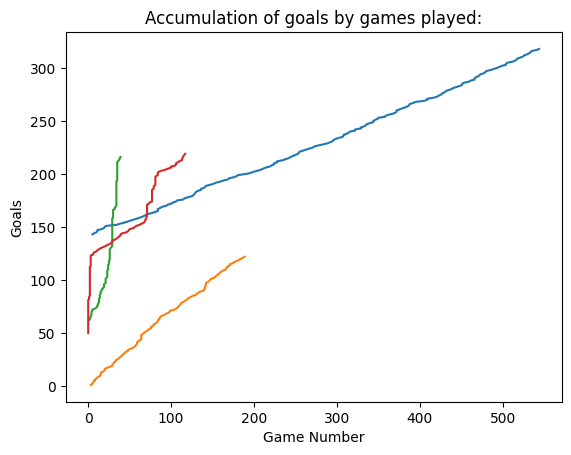

In [34]:
# mask data  based on playerId 
playerStats=merge_GamePlayerStats.loc[merge_GamePlayerStats["playerId"]==2005708162]


#playerName=playerStats.iloc[0,1]
#display(playerName)

playerStats=playerStats.sort_values(by='gameNumber')

#df.set_index(["gameNumber"])
#df.columns = df.iloc[0]


"""
display (playerStats[["gameId","year","round","gameNumber","playerId", "displayName","Goals","venue"]])

x=playerStats["gameNumber"]
y=playerStats["Goals"].cumsum()

display (x)

plt.plot (y,x)
plt.title ("Accumulation of goals by games played:" + playerName)
plt.xlabel("Game Number")
plt.ylabel("Goals")
plt.show
"""

players=["Franklin, Lance","Papley, Tom","Mumford, Shane","Hooker, Cale"]

for  player in players:
    playerStats=merge_GamePlayerStats.loc[merge_GamePlayerStats["displayName"]==player]
    playerStats=playerStats.sort_values(by='gameNumber')
    x=playerStats["gameNumber"]
    y=playerStats["Goals"].cumsum()
    plt.plot (y,x)
    plt.title ("Accumulation of goals by games played:")
    plt.xlabel("Game Number")
    plt.ylabel("Goals")
    plt.show